# Exploratory Data Analysis - Heart Failure Dataset

**Step 1: Loading the dataset**

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Step 2: Cleaning and basic inspection**

In [2]:
#Getting overview info 
df.info() 

#Getting descriptive statistic 
df.describe()

#Checking for missing values
df.isnull().sum()

#Checking for duplicate rows
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


0

**Step 3: Data Analysis**

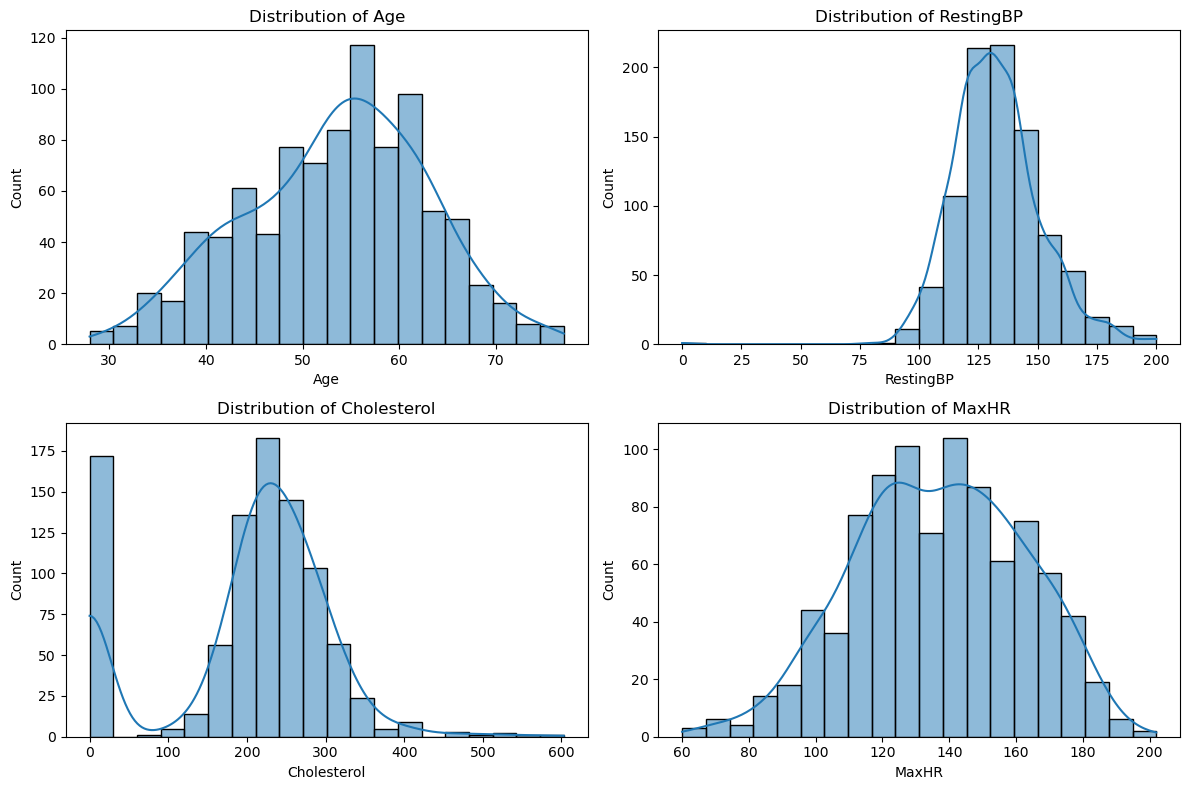

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Features to plot
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

#Plot histogram
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

*Age: patients cluster between the ages 50 and 60.*

*RestingBP: most of the blood pressure lies between 120 and 150 mmHG.*

Normal: < 120 mmHG,
High-Normal (Elevated): 120 - 129 mmHG,
High (Hypertension): 
    Stage 1: 130 - 139 mmHG,
    Stage 2: >= 140 mmHG

*Cholesterol: patients have between borderline-high and high cholesterol*

Normal cholesterol: < 200 mm/dl,
Borderline-high cholesterol: 200 - 239 mg/dl,
High cholesterol: >= 240 mg/dl

*MaxHR: MaxHR is approximately equal to 220 - Age, which is consistent with expected values during stress training*



**Average age and sex of patients with heart disease**

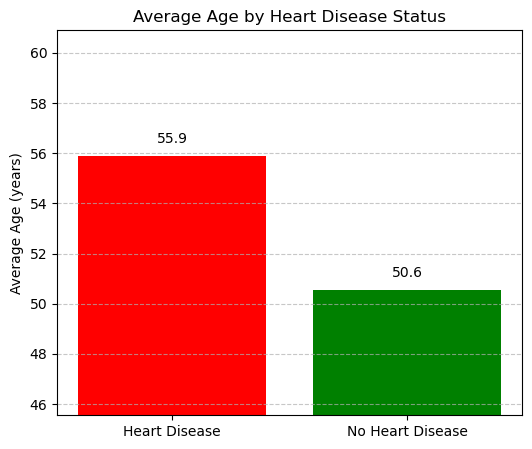

In [ ]:
avg_age_hd = df[df['HeartDisease'] == 1]['Age'].mean()
avg_age_no_hd = df[df['HeartDisease'] == 0]['Age'].mean()

labels = ['Heart Disease', 'No Heart Disease']
avg_ages = [avg_age_hd, avg_age_no_hd]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, avg_ages, color=['red', 'green'])

plt.ylabel('Average Age (years)')
plt.title('Average Age by Heart Disease Status')
plt.ylim(min(avg_ages) - 5, max(avg_ages) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}', ha='center')

plt.show()

Average age of people with heart disease: 55.9 years 

Average age of people without heart disease: 50.6 years

*This suggests that on average, patients with heart disease tend to be older compared to those without it. This age difference could indicate a correlation between aging and increased risk of heart disease.*

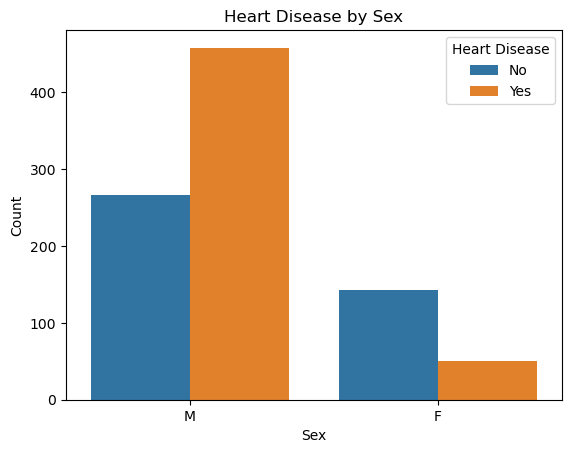

In [20]:
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Heart Disease by Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

*This chart shows that on average, more male patients are diagnosed with heart disease than female patients*

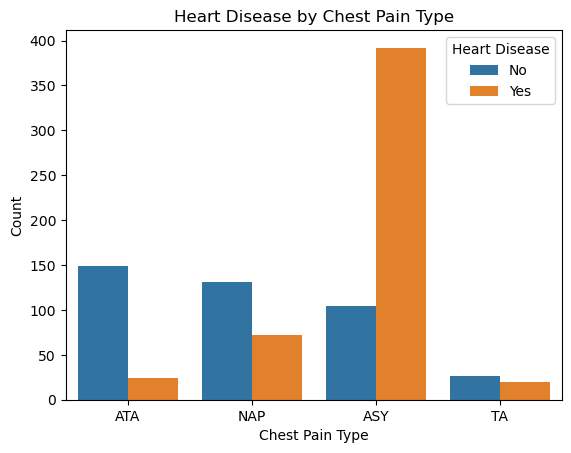

In [22]:
ax = sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title('Heart Disease by Chest Pain Type')
plt.ylabel('Count')
plt.xlabel('Chest Pain Type')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

plt.show()

*Based on this chart, ASY (Asymptomatic chest pain) has the higest proportion of people with heart disease, while TA (Typical Angina) has the lowest.*

This analysis suggests that patients that experienced ASY chest pain might actually be at higher risk for heart disease, even if they do not show typical symptoms. 

**Conclusion**

This exploratory data analysis provided key insights into factors that are associated with heart disease.

1. The average age of patients with heart disease is notably higher, indicating a correlation between aging and heart disease risk.

2. Male patients are diagnosed with heart disease more frequently than female patients. 

3. Among chest pain types, asymptomatic (ASY) patients show the highest incidence of heart disease, suggesting that even in the absence of typical symptoms, there may be underlying risk.

4. Numerical features like RestingBP, Cholesterol, and MaxHR show meaningful patterns that might help indentifying people at higher risk of heart disease. 

**Citation**

*fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.*

